Import Dataset

In [2]:
import pandas as pd

# Load your data
df = pd.read_csv('Fraud_Data.csv')
print(df.head())

   user_id          signup_time        purchase_time  purchase_value  \
0    22058  2015-02-24 22:55:49  2015-04-18 02:47:11              34   
1   333320  2015-06-07 20:39:50  2015-06-08 01:38:54              16   
2     1359  2015-01-01 18:52:44  2015-01-01 18:52:45              15   
3   150084  2015-04-28 21:13:25  2015-05-04 13:54:50              44   
4   221365  2015-07-21 07:09:52  2015-09-09 18:40:53              39   

       device_id source browser sex  age    ip_address  class  
0  QVPSPJUOCKZAR    SEO  Chrome   M   39  7.327584e+08      0  
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  3.503114e+08      0  
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2.621474e+09      1  
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3.840542e+09      0  
4  NAUITBZFJKHWW    Ads  Safari   M   45  4.155831e+08      0  


Remove Signup Time and Purchase Time and Create Cleaned Data CSV

In [3]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('Fraud_Data.csv')

# Convert the signup_time and purchase_time columns to datetime
df['signup_time'] = pd.to_datetime(df['signup_time'])
df['purchase_time'] = pd.to_datetime(df['purchase_time'])

# Calculate the time difference in minutes
df['time_difference'] = (df['purchase_time'] - df['signup_time']).dt.total_seconds() / 60

# Drop the signup_time and purchase_time columns
df = df.drop(columns=['signup_time', 'purchase_time'])

# Save the modified DataFrame to a new CSV
df.to_csv('cleaned_data.csv', index=False)

Import Cleaned Data Set and Inspect

In [4]:
import pandas as pd

# Load your data
df = pd.read_csv('cleaned_data.csv')
df.head()

,user_id,purchase_value,device_id,source,browser,sex,age,ip_address,class,time_difference
0,22058,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,75111.366667
1,333320,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,299.066667
2,1359,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,0.016667
3,150084,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,8201.416667
4,221365,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,72691.016667


In [5]:
df.shape

(151112, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   user_id          151112 non-null  int64  
 1   purchase_value   151112 non-null  int64  
 2   device_id        151112 non-null  object 
 3   source           151112 non-null  object 
 4   browser          151112 non-null  object 
 5   sex              151112 non-null  object 
 6   age              151112 non-null  int64  
 7   ip_address       151112 non-null  float64
 8   class            151112 non-null  int64  
 9   time_difference  151112 non-null  float64
dtypes: float64(2), int64(4), object(4)
memory usage: 11.5+ MB


In [7]:
df.describe(include='all')

,user_id,purchase_value,device_id,source,browser,sex,age,ip_address,class,time_difference
count,151112.000000,151112.000000,151112,151112,151112,151112,151112.000000,1.511120e+05,151112.000000,151112.000000
unique,NaN,NaN,137956,3,5,2,NaN,NaN,NaN,NaN
top,NaN,NaN,ITUMJCKWEYNDD,SEO,Chrome,M,NaN,NaN,NaN,NaN
freq,NaN,NaN,20,60615,61432,88293,NaN,NaN,NaN,NaN
mean,200171.040970,36.935372,NaN,NaN,NaN,NaN,33.140704,2.152145e+09,0.093646,82200.487477
std,115369.285024,18.322762,NaN,NaN,NaN,NaN,8.617733,1.248497e+09,0.291336,52104.385307
min,2.000000,9.000000,NaN,NaN,NaN,NaN,18.000000,5.209350e+04,0.000000,0.016667
25%,100642.500000,22.000000,NaN,NaN,NaN,NaN,27.000000,1.085934e+09,0.000000,36445.891667
50%,199958.000000,35.000000,NaN,NaN,NaN,NaN,33.000000,2.154770e+09,0.000000,82105.758333
75%,300054.000000,49.000000,NaN,NaN,NaN,NaN,39.000000,3.243258e+09,0.000000,127408.741667


Check for Missing Values

In [8]:
df.isnull().sum()

user_id            0
purchase_value     0
device_id          0
source             0
browser            0
sex                0
age                0
ip_address         0
class              0
time_difference    0
dtype: int64

Check for Unique Values

In [9]:
df.nunique()

user_id            151112
purchase_value        122
device_id          137956
source                  3
browser                 5
sex                     2
age                    58
ip_address         143512
class                   2
time_difference    143513
dtype: int64

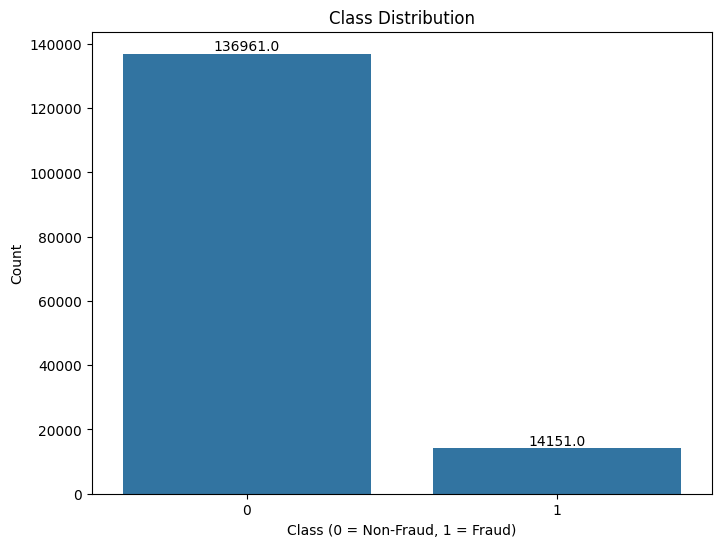

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and 'class' is the column name
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=df)
plt.title('Class Distribution')
plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Count')

# Add data labels
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', 
                       (p.get_x() + p.get_width() / 2, p.get_height()), 
                       ha='center', va='bottom', fontsize=10, color='black')
plt.show()

/var/folders/sy/h_1p1n5n1jn4yzlw5d4ym9dm0000gn/T/ipykernel_54407/251864107.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="class", y="purchase_value", palette="Set2")


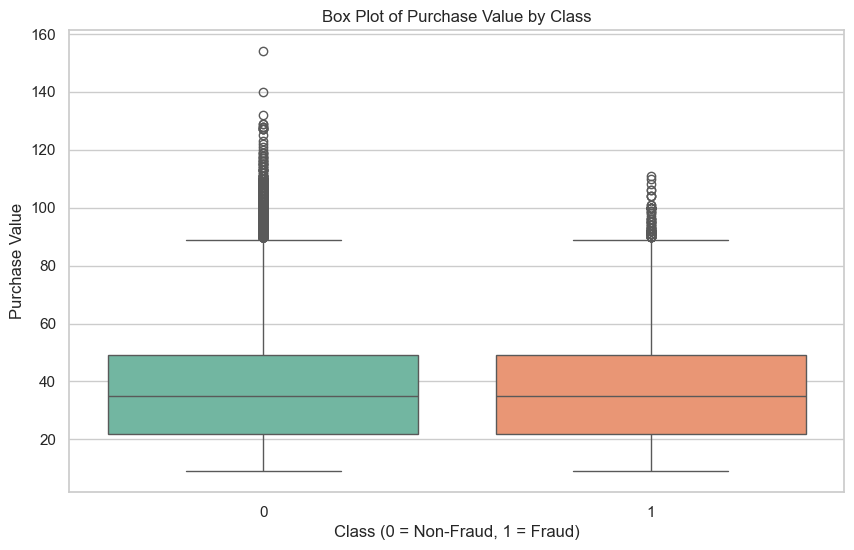

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Plot boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="class", y="purchase_value", palette="Set2")

# Labels and title
plt.xlabel("Class (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Purchase Value")
plt.title("Box Plot of Purchase Value by Class")

# Show plot
plt.show()

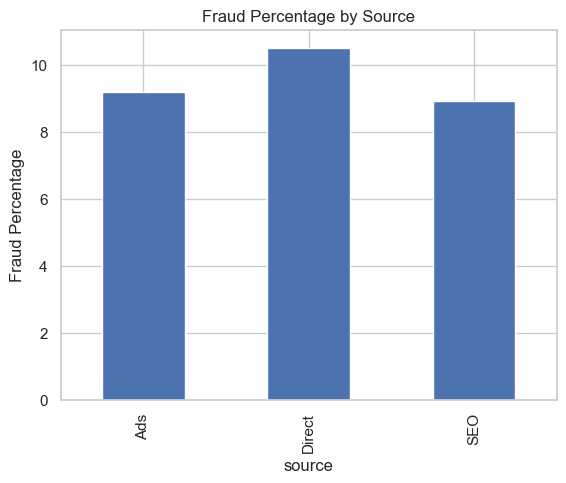

In [12]:
# Barplot for fraud by source
fraud_by_source = df.groupby('source')['class'].apply(lambda x: (x == 1).mean() * 100)
fraud_by_source.plot(kind='bar', title='Fraud Percentage by Source')
plt.ylabel('Fraud Percentage')
plt.show()

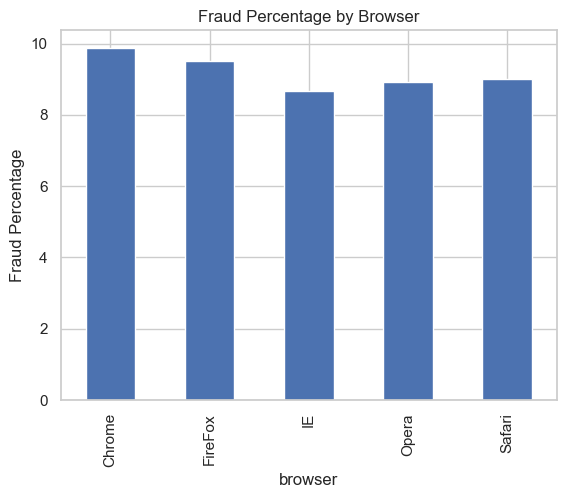

In [13]:
fraud_by_browser = df.groupby('browser')['class'].apply(lambda x: (x == 1).mean() * 100)
fraud_by_browser.plot(kind='bar', title='Fraud Percentage by Browser')
plt.ylabel('Fraud Percentage')
plt.show()

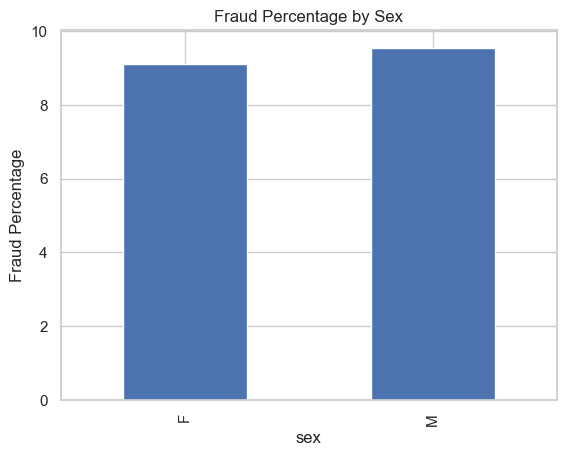

In [14]:
# Barplot for fraud by sex
fraud_by_sex = df.groupby('sex')['class'].apply(lambda x: (x == 1).mean() * 100)
fraud_by_sex.plot(kind='bar', title='Fraud Percentage by Sex')
plt.ylabel('Fraud Percentage')
plt.show()

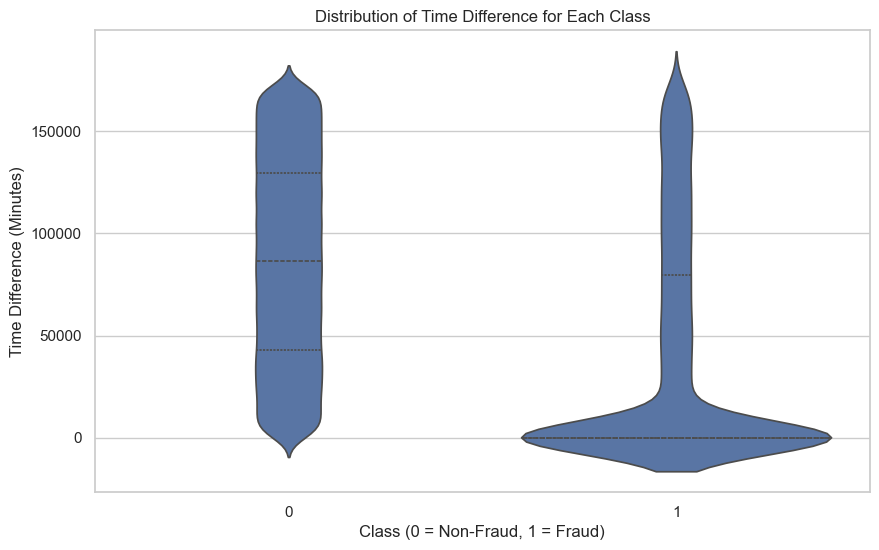

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.violinplot(x='class', y='time_difference', data=df, inner="quartile")
plt.title('Distribution of Time Difference for Each Class')
plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Time Difference (Minutes)')
plt.show()

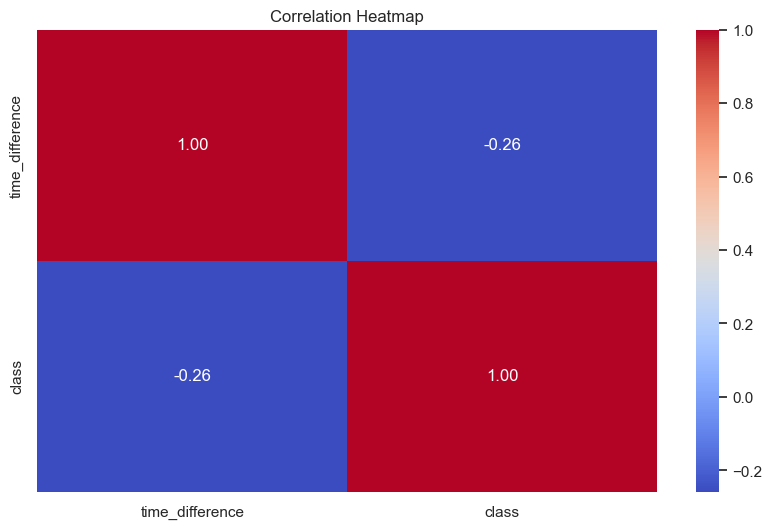

In [16]:
# Correlation heatmap
correlation_matrix = df[['time_difference', 'class']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [17]:

# Filter for fraudulent transactions
fraud_df = df[df['class'] == 1]

# Count fraudulent transactions by each identifier and filter those with more than one occurrence
# By IP Address
fraud_by_ip = fraud_df.groupby('ip_address').size().reset_index(name='fraud_count')
repeated_fraud_ip = fraud_by_ip[fraud_by_ip['fraud_count'] > 1]

# By User ID
fraud_by_user = fraud_df.groupby('user_id').size().reset_index(name='fraud_count')
repeated_fraud_user = fraud_by_user[fraud_by_user['fraud_count'] > 1]

# By Device ID
fraud_by_device = fraud_df.groupby('device_id').size().reset_index(name='fraud_count')
repeated_fraud_device = fraud_by_device[fraud_by_device['fraud_count'] > 1]

# Display results
print("IP addresses with multiple fraudulent transactions:\n", repeated_fraud_ip)
print("\nUser IDs with multiple fraudulent transactions:\n", repeated_fraud_user)
print("\nDevice IDs with multiple fraudulent transactions:\n", repeated_fraud_device)

IP addresses with multiple fraudulent transactions:
         ip_address  fraud_count
0     2.278096e+06           15
10    6.150367e+06            9
30    1.666923e+07           10
32    1.819146e+07            5
50    2.584822e+07            6
...            ...          ...
7224  4.262695e+09           12
7248  4.275223e+09           10
7253  4.279796e+09           11
7259  4.281743e+09            6
7274  4.292714e+09            5

[759 rows x 2 columns]

User IDs with multiple fraudulent transactions:
 Empty DataFrame
Columns: [user_id, fraud_count]
Index: []

Device IDs with multiple fraudulent transactions:
           device_id  fraud_count
0     AAAXXOZJRZRAO           10
7     AANYBGQSWHRTK            7
31    ADEDUDCYQMYTI           13
32    ADFZEAZJYIAOI            2
36    AEIDJUGTZWDBU            2
...             ...          ...
6969  ZYPKBBYHNPZDI            2
6977  ZYZQZXBXADPST           15
6979  ZZCAWCKYVMWNH            8
6980  ZZFFPOVMCQVCG            6
6985  ZZQPVRBHRM